## **Natural language processing (NLP)**

Applications

• Audio Classification → Ayol va erkak ovozini ajratish , emotsiyalarni farqlash

Speech Recognition -> S-T nutqani textga aylantish

Text To Speech

Speaker Recognition/Verification -> ovozli malumotni tastiqlash

Audio Denoising -> ovozdagi shivqinlarni yo'qotish

Music Generation - musiqa yozish

In [ ]:
from IPython.display import Image
Image(url='https://datasciencedojo.com/wp-content/uploads/MicrosoftTeams-image-34-1.jpg',height=400)

Important Terms

• Signal

Amplitude - o'rtacha qiymatdan eng malandgacha bo'lgan masofa

period - har bir takrorlanish davri
  
Sample Rate - 1 sekundda qancha malumot yozib olishi. Qancha ko'p Samlple rate bo'lsa audio sifati shuncha yaxshi bo'ladi. fps kabi

Frequency - Takrorlanish tezligi

• Waveform

• Fourier Transform

FFT, STFT

Spectrogram https://musiclab.chromeexperiments.com/spectrogram/

In [ ]:
Image(url='https://neuron.eng.wayne.edu/auth/ece3310/signal_basics_files/image036.jpg',height=300)

30 fps 1 sekundda 30 kadr rasmga oladi va birlashtirib video qiladi



In [ ]:
Image(url='https://8f430952.rocketcdn.me/wp-content/uploads/2021/07/image-60.png')

Time Domein - takrorlanish vaqti

Frequency domein - takrorlanish tezligi

In [ ]:
Image(url='https://www.mathworks.com/discovery/natural-language-processing/_jcr_content/mainParsys/band_copy/mainParsys/lockedsubnav/mainParsys/columns_256689204/6e7ffbf5-4525-48e6-9d8b-7948a4623688/image_copy.adapt.full.medium.jpg/1715158852133.jpg',height=400)
 # NLP bosqichlari

https://commonvoice.mozilla.org/uz ovozlar datasets https://uzbekvoice.ai/

## voice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

In [2]:
ipd.Audio('/content/common_voice_uz_27043256.mp3')

In [6]:
import os
os.listdir() #fayllarni ko'rish

['.config',
 'common_voice_uz_27043258.mp3',
 'common_voice_uz_27043256.mp3',
 'drive',
 'common_voice_uz_27043260.mp3',
 'sample_data']

In [3]:
data , sr = librosa.load('/content/common_voice_uz_27043256.mp3')

In [7]:
data

array([ 1.8621216e-12, -2.8191295e-12,  5.5053504e-13, ...,
       -4.6219053e-08,  4.0953321e-09,  0.0000000e+00], dtype=float32)

In [8]:
sr

22050

In [4]:
len(data)

105576

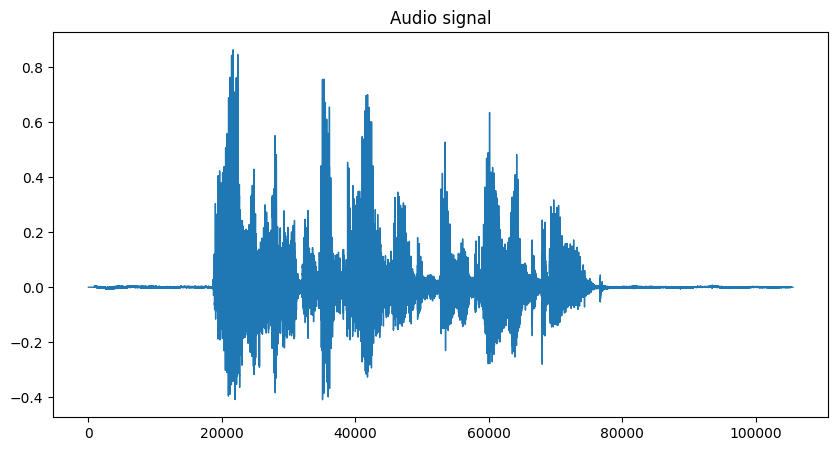

In [9]:
pd.Series(data).plot(figsize=(10,5),
                     lw=1,
                     title='Audio signal',
                     )
plt.show()

In [13]:
melspec = librosa.feature.melspectrogram(y=data, sr=sr)

In [14]:
melspec

array([[2.2034901e-06, 7.2777495e-03, 2.7925692e-02, ..., 2.2259656e-04,
        4.6941801e-04, 2.8409637e-04],
       [1.9607212e-06, 2.9108746e-03, 7.1228347e-03, ..., 1.4279877e-04,
        4.0278982e-04, 1.9620771e-04],
       [1.7028096e-06, 1.0339567e-03, 2.2066215e-03, ..., 5.1086467e-05,
        1.3648684e-04, 8.2023878e-05],
       ...,
       [4.2190704e-09, 7.2246366e-06, 8.6425665e-05, ..., 3.2935808e-05,
        2.3020017e-05, 6.2740150e-06],
       [3.1429930e-09, 4.7728076e-06, 4.1786661e-05, ..., 2.7613622e-05,
        1.9465375e-05, 5.5714063e-06],
       [1.2261293e-09, 7.4058255e-07, 4.5044681e-06, ..., 2.8202562e-06,
        2.2512502e-06, 5.5502966e-07]], dtype=float32)

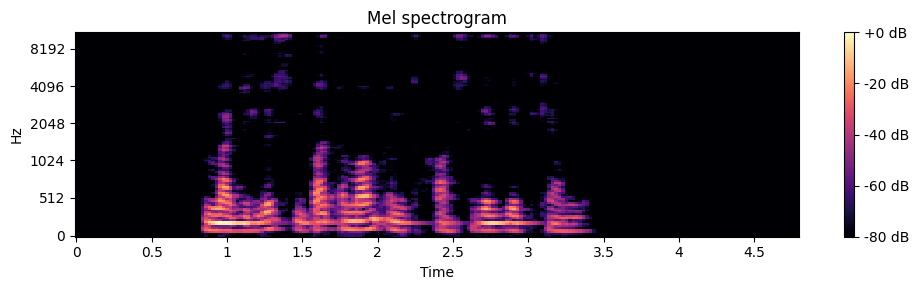

In [15]:
log_s = librosa.amplitude_to_db(melspec, ref=np.max)

plt.figure(figsize=(10,3))
librosa.display.specshow(log_s, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [16]:
log_s

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

## noise (shovqin) qo'shish

In [17]:
# noise (shovqin) qo'shuvchi funksiya

def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [18]:
augmented_signal = add_white_noise(data,0.1)

In [19]:
import soundfile as sf
sf.write("augmented_audio_white_noice.wav", augmented_signal, sr)

In [20]:
ipd.Audio('/content/augmented_audio_white_noice.wav') # noise qo'shildi

<Figure size 1000x300 with 0 Axes>

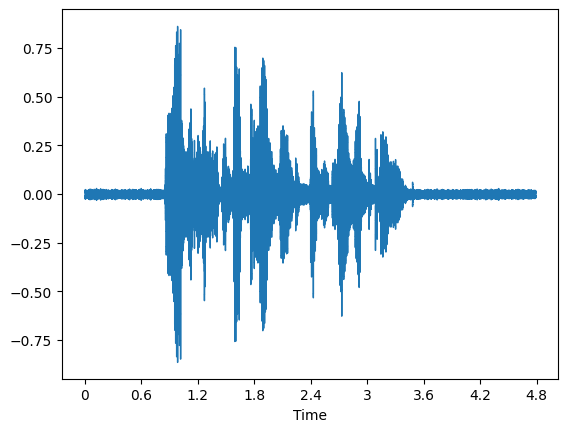

In [21]:
plt.figure(figsize=(10,3))
plt.figure()
librosa.display.waveshow(augmented_signal, sr=sr)
plt.show()

## ovozni tezlashtirish / sekinlashtirish

In [22]:
# ovozni tezlashtiruvchi / sekinlashtiruvchi funksiya

def time_stretch(signal, time_stretch_rate):

    return librosa.effects.time_stretch(signal, rate = time_stretch_rate)

In [23]:
augmented_signal = time_stretch(data,0.8)

sf.write("augmented_audio_time_stretch.wav", augmented_signal, sr)

In [24]:
ipd.Audio("/content/augmented_audio_time_stretch.wav")

## ovozni ingichkalashtirish / yo'g'onlashtirish

In [25]:
# ovozni ingichkalashtirish / yo'g'onlashtirish

def pitch_scale(signal, sr = 22050, num_semitones = 2):

    return librosa.effects.pitch_shift(y = signal, sr = sr, n_steps = num_semitones)

In [26]:
augmented_signal = pitch_scale(data, num_semitones = 4) # - number yo'gomlashtiradi

sf.write("augmented_audio_time_stretch.wav", augmented_signal, sr)

In [27]:
ipd.Audio("/content/augmented_audio_time_stretch.wav")

https://librosa.org/doc/latest/index.html Librosa documentation

## Feature Extraction

https://huggingface.co/

Feature:

1. Mean Frequency - {mean= sum/n}

2. Standard Deviation

3. Median

4. Spectral Flatness (sfm) - Qanchalik shovqin borligini ko'rsatadi

5. Mode - eng ko'p qatnashgan qiymat (value)

6. Sentroid => mean

In [29]:
import librosa
import pandas as pd
import os
from scipy.stats import kurtosis, mode

In [52]:
def extract_mean_frequency(y, sr=22050):
    return librosa.feature.spectral_centroid(y=y, sr=sr).mean()

def extract_mean_frequency(y, sr=22050):
    return librosa.feature.spectral_centroid(y=y, sr=sr).std()

def extract_mean_frequency(y, sr=22050):
    return librosa.feature.spectral_centroid(y=y, sr=sr)[0]

def extract_kurtosis(y):
    return kurtosis(y)

def extract_spectral_flatness(y):
    return librosa.feature.spectral_flatness(y=y)[0]

def extract_mode(y):
    return mode(y)[0]

def extract_centroid(y, sr):
    return librosa.feature.spectral_centroid(y=y, sr=sr)[0]

def extract_peak(y, sr):
    return librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

def extract_mean_function (y, sr):
    return librosa.feature.mfcc(y=y, sr=sr)[0].mean()

def extract_minimum_function (y, sr):
    return librosa.feature.mfcc(y=y, sr=sr).min()

def extract_maximum_function(y, sr):
    return librosa.feature.mfcc(y=y, sr=sr).max()

def extract_mean_dom(y, sr):
    return librosa.feature.spectral_bandwidth(y=y, sr=sr)[0].mean()

def extract_minimum_dom(y, sr):
    return librosa.feature.spectral_bandwidth (y=y, sr=sr).min()

def extract_maximum_dom(y, sr):
    return librosa.feature.spectral_bandwidth(y=y, sr=sr).max()

def extract_dfrange(maxdom, mindom) :
    return maxdom - mindom

def extract_modindx (y, sr):
    return librosa.feature.tempogram(y=y, sr=sr).mean()

In [53]:
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    meanfreq = extract_mean_frequency(y, sr)
    kurt = extract_kurtosis(y)
    sfm = extract_spectral_flatness(y)
    mode = extract_mode(y)
    centroid = extract_centroid(y, sr)
    peakf = extract_peak(y, sr)
    meanfun = extract_mean_function(y, sr)
    minfun = extract_minimum_function(y, sr)
    maxfun = extract_maximum_function(y, sr)
    meandom = extract_mean_dom(y, sr)
    mindom = extract_minimum_dom(y, sr)
    maxdom = extract_maximum_dom(y, sr)
    frange = extract_dfrange(maxdom, mindom)
    modinax = extract_modindx(y, sr)

    features = {
      'meanfreq' : meanfreq,
      'kurt': kurt,
      'sfm': sfm,
      'mode': mode,
      'centroid': centroid,
      'peakf': peakf,
      'meanfun': meanfun,
      'minfun': minfun,
      'maxfun': maxfun,
      'meandom': meandom,
      'mindom': mindom,
      'maxdom': maxdom,
      'drange': frange,
      'modindx': modinax
    }

    return features

In [55]:
def process_audio_directory(input_dir, output_file):
    # Initialize an empty list to store features
    features_list = []

    # Loop through all audio files in the directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.mp3'):
            audio_file = os.path.join(input_dir, filename)
            features = extract_features(audio_file)
            features_list.append(features)

    # Convert the list of features to a DataFrame
    df = pd.DataFrame(features_list)

    # Save the DataFrame to a CSV file
    df.to_csv(output_file, index=False)

# Example usage:
input_directory = 'audio/'
output_csv_file = 'output_features_new.csv'
process_audio_directory(input_directory, output_csv_file)

Spectrogram https://musiclab.chromeexperiments.com/Spectrogram/